In [ ]:
!pip install "dask[complete]"

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
#Upload API Token -> kaggle.json
files.upload()

# Process for using Kaggle service in Google colab

In [ ]:
 ! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-08 09:30:51           4583  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2626  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            283  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            640  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
#Download data
!kaggle competitions download -c microsoft-malware-prediction

 99% 133M/134M [00:01<00:00, 79.8MB/s]
100% 134M/134M [00:01<00:00, 95.9MB/s]
 99% 665M/672M [00:08<00:00, 71.6MB/s]
100% 672M/672M [00:08<00:00, 83.6MB/s]
 99% 761M/768M [00:08<00:00, 68.2MB/s]
100% 768M/768M [00:09<00:00, 88.7MB/s]


In [ ]:
#Unzip the dataset
! unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


In [ ]:
#Dask dataframe helps to works with large datsets
dtypes2 = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }


In [ ]:
dataset = dd.read_csv('train/train.csv',dtype=dtypes2)

In [ ]:
dataset.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

In [ ]:
#Convert dask dataframe to pandas dataframe
datasetPandas = dataset.compute()

In [ ]:
datasetPandas.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

In [ ]:
#Check how many datas we have
#Must be: (8921483, 83)
datasetPandas.shape

(8921483, 83)

In [ ]:
def filterTheDict(dictObj, callback):
    cat = dict()
    num = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if callback((key, value)):
            #Filter categorical variables
            cat[key] = value
        else:
            #Filter numeric variables
            num[key] = value
    return cat, num

# Variables types

In [ ]:
#Filter categorical and numeric variables
catVariablesDict,numVariablesDict = filterTheDict(dtypes2, lambda elem: elem[1] == 'category')

In [ ]:
#Categorical variables
catVariablesDict

{'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Census_ActivationChannel': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_DeviceFamily': 'category',
 'Census_FlightRing': 'category',
 'Census_GenuineStateName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSVersion': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ProcessorClass': 'category',
 'EngineVersion': 'category',
 'MachineIdentifier': 'category',
 'OsBuildLab': 'category',
 'OsPlatformSubRelease': 'category',
 'OsVer': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'ProductName': 'category',
 'PuaMode': 'category',
 'SkuEdition': 'category',
 'SmartS

In [ ]:
#Numeric variables
numVariablesDict

{'AVProductStatesIdentifier': 'float32',
 'AVProductsEnabled': 'float16',
 'AVProductsInstalled': 'float16',
 'AutoSampleOptIn': 'int8',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_FirmwareVersionIdentifier': 'float32',
 'Census_HasOpticalDiskDrive': 'int8',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_IsPenCapable': 'int8',
 'Census_IsPortableOperatingSystem': 'int8',
 'Census_IsSecureBootEnabled': 'int8',
 'Census_IsTouchEnabled': 'int8',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_OEMModelIdentifier': 'float32',
 'Census_OEMNameIdentifier': 'float16',
 'Census_OSBuildNumber': 'int16'

In [ ]:
def DictToList(dict):
    l = []
    for key, value in dict.items():
        l.append(key)
    return l

In [ ]:
#Seperate the name of the categorical and numeric variables
catVariablesList = DictToList(catVariablesDict)
numVariablesList = DictToList(numVariablesDict)

# Missing data

In [ ]:
def missingValuesPercentage(dataset):
  #Count of missing values
  missingCount = dataset.isnull().sum() 
  #Count of all values 
  valueCount = dataset.isnull().count() 
  #Percentage of missing values
  missingPercentage = round(missingCount / valueCount * 100,2) 
  #Dataframe with missing values
  #missingDf = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) 
  #print(missingDf)
  return missingPercentage

In [ ]:
def SortedMissingDataPercentage (SortMissingPercentage):
    for colName, miss in SortMissingPercentage.items():
        print(f"Column: {colName}, Missing data: {miss}%")

In [ ]:
#Calculate the new missing data percentage
missingPercentageV1 = missingValuesPercentage(datasetPandas)
#Sort missing percentage serie
SortMissingPercentageV1 = missingPercentageV1.sort_values(ascending=False)

In [ ]:
#Verify missing values
SortedMissingDataPercentage(SortMissingPercentageV1)

Column: PuaMode, Missing data: 99.97%
Column: Census_ProcessorClass, Missing data: 99.59%
Column: DefaultBrowsersIdentifier, Missing data: 95.14%
Column: Census_IsFlightingInternal, Missing data: 83.04%
Column: Census_InternalBatteryType, Missing data: 71.05%
Column: Census_ThresholdOptIn, Missing data: 63.52%
Column: Census_IsWIMBootEnabled, Missing data: 63.44%
Column: SmartScreen, Missing data: 35.61%
Column: OrganizationIdentifier, Missing data: 30.84%
Column: SMode, Missing data: 6.03%
Column: CityIdentifier, Missing data: 3.65%
Column: Wdft_IsGamer, Missing data: 3.4%
Column: Wdft_RegionIdentifier, Missing data: 3.4%
Column: Census_InternalBatteryNumberOfCharges, Missing data: 3.01%
Column: Census_FirmwareManufacturerIdentifier, Missing data: 2.05%
Column: Census_IsFlightsDisabled, Missing data: 1.8%
Column: Census_FirmwareVersionIdentifier, Missing data: 1.79%
Column: Census_OEMModelIdentifier, Missing data: 1.15%
Column: Census_OEMNameIdentifier, Missing data: 1.07%
Column: Fir

# **Dataset Preprocessing**

In [ ]:
#Create a dataset copy
datasetV2 = datasetPandas.copy()

In [ ]:
#Drop columns with more than 90% of missing data
datasetV2 = datasetV2.drop(['PuaMode','Census_ProcessorClass','DefaultBrowsersIdentifier'], axis=1)

In [ ]:
#Drop columns without description and that have missing data between 10% and 90% 
datasetV2 = datasetV2.drop(['Census_IsFlightingInternal','Census_InternalBatteryType','Census_ThresholdOptIn','Census_IsWIMBootEnabled'], axis=1)

In [ ]:
#Calculate the new missing data percentage
missingPercentageV2 = missingValuesPercentage(datasetV2)
#Sort missing percentage serie
SortMissingPercentageV2 = missingPercentageV2.sort_values(ascending=False)

In [ ]:
#Verify missing values
SortedMissingDataPercentage(SortMissingPercentageV2)

Column: SmartScreen, Missing data: 35.61%
Column: OrganizationIdentifier, Missing data: 30.84%
Column: SMode, Missing data: 6.03%
Column: CityIdentifier, Missing data: 3.65%
Column: Wdft_RegionIdentifier, Missing data: 3.4%
Column: Wdft_IsGamer, Missing data: 3.4%
Column: Census_InternalBatteryNumberOfCharges, Missing data: 3.01%
Column: Census_FirmwareManufacturerIdentifier, Missing data: 2.05%
Column: Census_IsFlightsDisabled, Missing data: 1.8%
Column: Census_FirmwareVersionIdentifier, Missing data: 1.79%
Column: Census_OEMModelIdentifier, Missing data: 1.15%
Column: Census_OEMNameIdentifier, Missing data: 1.07%
Column: Firewall, Missing data: 1.02%
Column: Census_TotalPhysicalRAM, Missing data: 0.9%
Column: Census_IsAlwaysOnAlwaysConnectedCapable, Missing data: 0.8%
Column: Census_OSInstallLanguageIdentifier, Missing data: 0.67%
Column: IeVerIdentifier, Missing data: 0.66%
Column: Census_PrimaryDiskTotalCapacity, Missing data: 0.59%
Column: Census_SystemVolumeTotalCapacity, Missing

In [ ]:
#Extract the dirty variables
colClean = []
colDirty = []
for colName, miss in SortMissingPercentageV2.items():
    if (miss != 0):
        #Column has missing values
        colDirty.append(colName)
        pass
    else:
        colClean.append(colName)

In [ ]:
#Separate numeric and categorical variables 
catDirtyVar = []
numDirtyVar = []
for i in colDirty:
    if (dtypes2[i] == 'category'):
        catDirtyVar.append(i)
    else:
        numDirtyVar.append(i)


In [ ]:
#Save cleaned variables
cleanColumns = datasetV2[colClean]

In [ ]:
dirtyCatColumns = datasetV2[catDirtyVar]
dirtyNumColumns = datasetV2[numDirtyVar]

In [ ]:
#Add the new category "UNKNOWN" 
dirtyCatColumns["SmartScreen"] = dirtyCatColumns["SmartScreen"].cat.add_categories('UNKNOWN')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Fill the missing data with "UNKNOWN" in categorical variables
cleanedCatColumns = dirtyCatColumns.apply(lambda var: var.fillna("UNKNOWN"))

In [ ]:
cleanedCatColumns

,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName
0,UNKNOWN,HDD,Desktop
1,UNKNOWN,HDD,Notebook
2,RequireAdmin,SSD,Desktop
3,ExistsNotSet,UNKNOWN,MiniTower
4,RequireAdmin,HDD,Portable
...,...,...,...
67082,RequireAdmin,HDD,Notebook
67083,RequireAdmin,Unspecified,SpaceSaving
67084,UNKNOWN,SSD,Notebook
67085,UNKNOWN,HDD,Notebook


In [ ]:
#Fill the missing data with median in numeric variables
cleanedNumColumns = dirtyNumColumns.fillna(dirtyNumColumns.median())

In [ ]:
cleanedNumColumns

,OrganizationIdentifier,SMode,CityIdentifier,Wdft_RegionIdentifier,Wdft_IsGamer,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_IsFlightsDisabled,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_ProcessorModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,UacLuaenable
0,18.0,0.0,128035.0,10.0,0.0,4.294967e+09,628.0,0.0,36144.0,9124.0,2668.0,1.0,4096.0,0.0,26.0,137.0,476940.0,299451.0,18.906250,1440.0,900.0,2340.0,4.0,5.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
1,18.0,0.0,1482.0,8.0,0.0,1.000000e+00,628.0,0.0,57858.0,91656.0,2668.0,1.0,4096.0,0.0,8.0,137.0,476940.0,102385.0,13.898438,1366.0,768.0,2404.0,4.0,5.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
2,18.0,0.0,153579.0,3.0,0.0,4.294967e+09,142.0,0.0,52682.0,317701.0,4908.0,1.0,4096.0,0.0,7.0,137.0,114473.0,113907.0,21.500000,1920.0,1080.0,1972.0,4.0,5.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
3,27.0,0.0,20710.0,3.0,0.0,4.294967e+09,355.0,0.0,20050.0,275890.0,1443.0,1.0,4096.0,0.0,17.0,137.0,238475.0,227116.0,18.500000,1366.0,768.0,2272.0,4.0,5.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
4,27.0,0.0,37376.0,1.0,0.0,0.000000e+00,355.0,0.0,19844.0,331929.0,1443.0,1.0,6144.0,0.0,8.0,137.0,476940.0,101900.0,14.000000,1366.0,768.0,2500.0,4.0,5.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67082,27.0,0.0,84963.0,5.0,0.0,0.000000e+00,556.0,0.0,63069.0,189419.0,585.0,1.0,4096.0,0.0,14.0,117.0,953869.0,936175.0,15.500000,1366.0,768.0,142.0,4.0,1.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
67083,27.0,0.0,82414.0,5.0,0.0,4.294967e+09,500.0,0.0,33070.0,275958.0,1443.0,1.0,2048.0,0.0,14.0,86.0,76293.0,75741.0,19.000000,1280.0,1024.0,3366.0,2.0,5.0,1.0,2.0,59914.0,0.0,7.0,0.0,1.0
67084,27.0,0.0,134580.0,7.0,0.0,0.000000e+00,513.0,0.0,71061.0,315307.0,4904.0,1.0,8192.0,0.0,37.0,117.0,244198.0,242989.0,15.500000,1920.0,1080.0,3104.0,8.0,5.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
67085,33.0,0.0,159430.0,13.0,0.0,0.000000e+00,554.0,0.0,33142.0,228975.0,2102.0,1.0,4096.0,0.0,8.0,108.0,476940.0,463486.0,12.703125,1024.0,768.0,1998.0,2.0,5.0,1.0,3.0,6630.0,1.0,7.0,0.0,1.0


In [ ]:
#Concat the cleaned variables
cleanedVariables = pd.concat([cleanedCatColumns,cleanedNumColumns], axis=1)

In [ ]:
#Create the cleaned dataset
datasetV3 = pd.concat([cleanColumns,cleanedVariables], axis=1)

In [ ]:
#Verify the cleaned dataset
datasetV3.shape

(8921483, 76)

In [ ]:
#Calculate the new missing data percentage
missingPercentageV3 = missingValuesPercentage(datasetV3)
#Sort missing percentage serie
SortMissingPercentageV3 = missingPercentageV3.sort_values(ascending=False)

In [ ]:
SortedMissingDataPercentage(SortMissingPercentageV3)

Column: UacLuaenable, Missing data: 0.0%
Column: Census_OSWUAutoUpdateOptionsName, Missing data: 0.0%
Column: Census_IsPenCapable, Missing data: 0.0%
Column: Census_IsTouchEnabled, Missing data: 0.0%
Column: Census_IsSecureBootEnabled, Missing data: 0.0%
Column: Census_FlightRing, Missing data: 0.0%
Column: Census_ActivationChannel, Missing data: 0.0%
Column: Census_GenuineStateName, Missing data: 0.0%
Column: Census_IsPortableOperatingSystem, Missing data: 0.0%
Column: Census_OSUILocaleIdentifier, Missing data: 0.0%
Column: Census_IsVirtualDevice, Missing data: 0.0%
Column: Census_OSInstallTypeName, Missing data: 0.0%
Column: Census_OSSkuName, Missing data: 0.0%
Column: Census_OSEdition, Missing data: 0.0%
Column: Census_OSBuildRevision, Missing data: 0.0%
Column: Census_OSBuildNumber, Missing data: 0.0%
Column: Census_OSBranch, Missing data: 0.0%
Column: Census_OSArchitecture, Missing data: 0.0%
Column: AutoSampleOptIn, Missing data: 0.0%
Column: SkuEdition, Missing data: 0.0%
Column

In [ ]:
#Download the cleaned dataset: Optional
datasetV3.to_csv('/content/MalwareCleanedDataset.csv',index=False)

In [ ]:
#from google.colab import files

In [ ]:
#files.download('MalwareCleanedDataset.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Read cleaned dataset if file "MalwareCleanedDataset.csv" is ready
datasetCleaned = dd.read_csv("MalwareCleanedDataset.csv",dtype=dtypes2)
datasetV3 = datasetCleaned.compute()

In [ ]:
#Verify the cleaned dataset
#Must be: (8921483, 76)
datasetV3.shape

(8921483, 76)

In [ ]:
datasetCleanedPandas = datasetV3

# **Univariate analysis**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

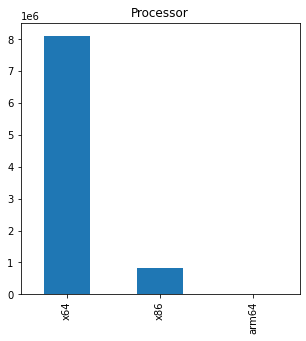

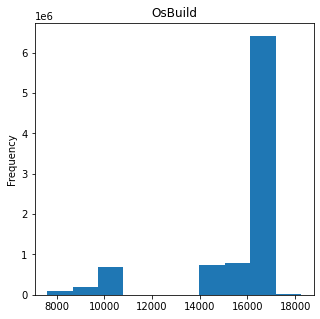

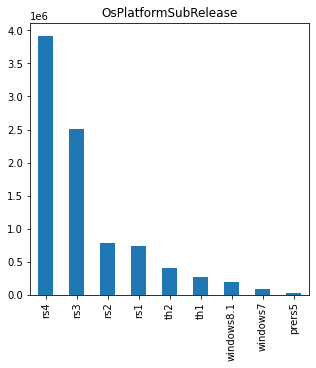

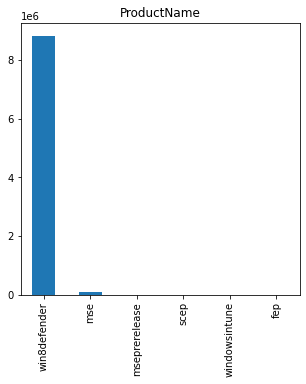

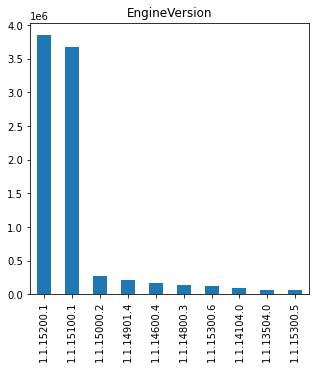

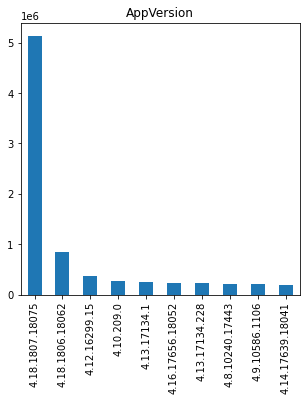

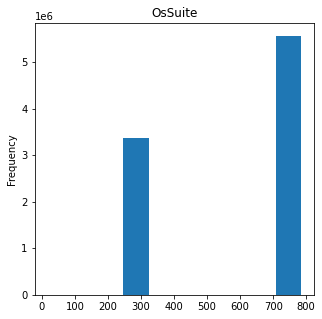

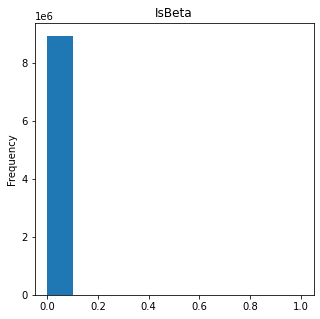

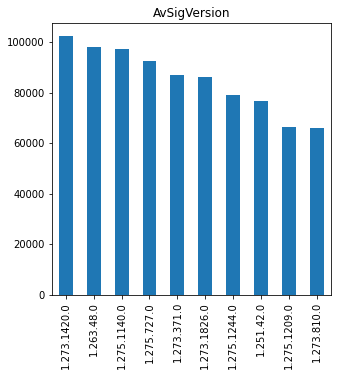

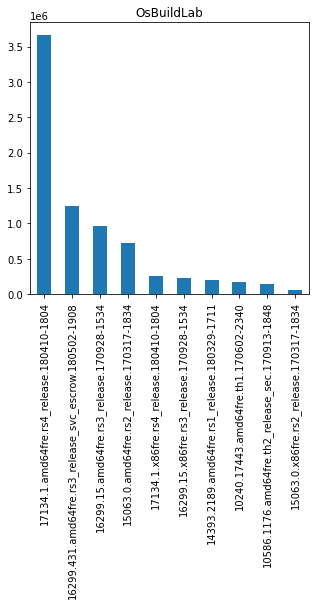

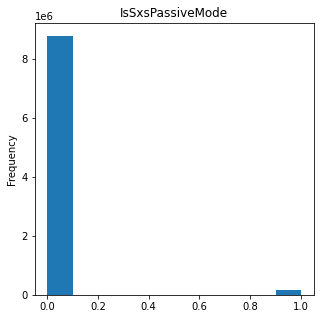

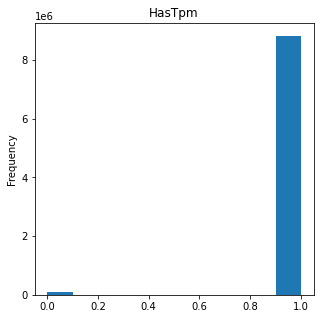

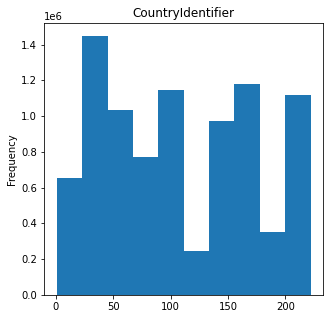

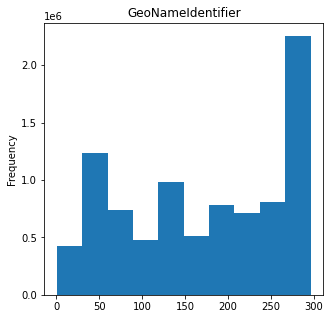

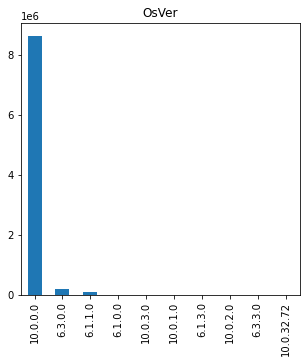

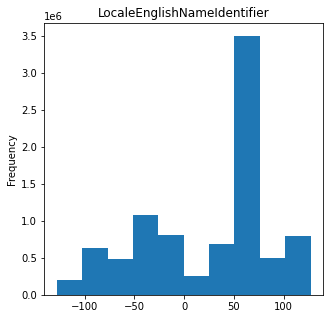

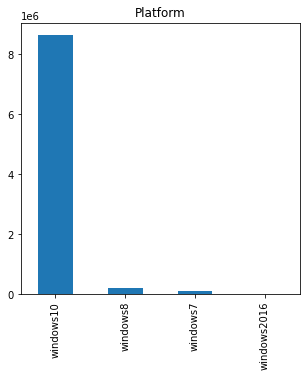

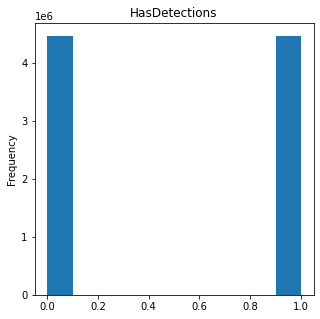

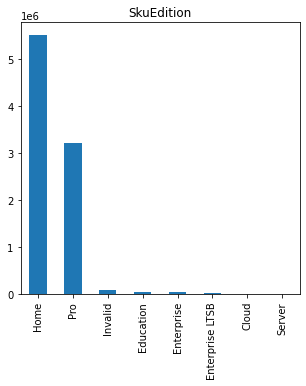

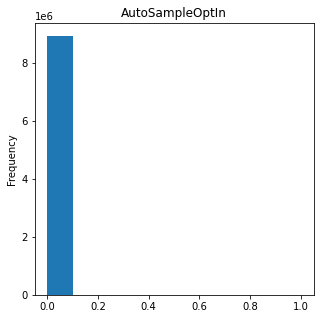

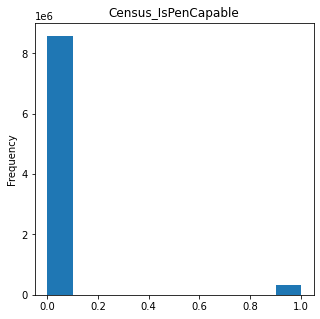

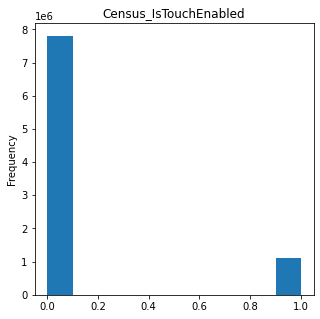

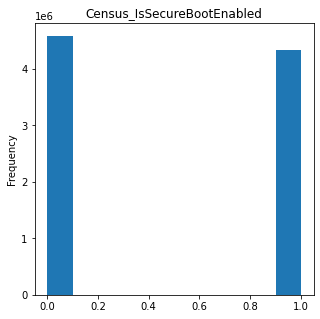

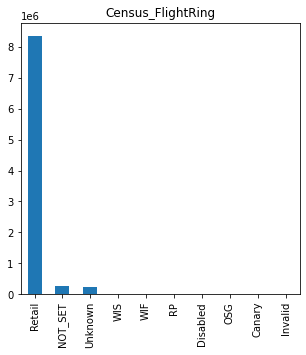

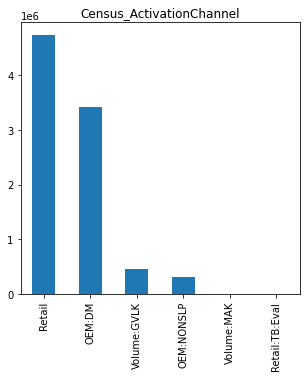

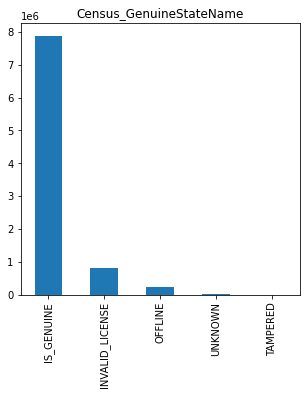

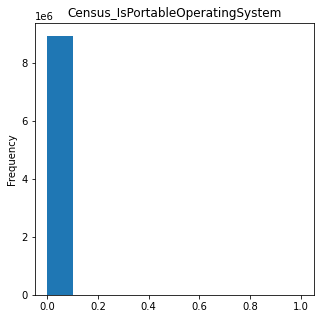

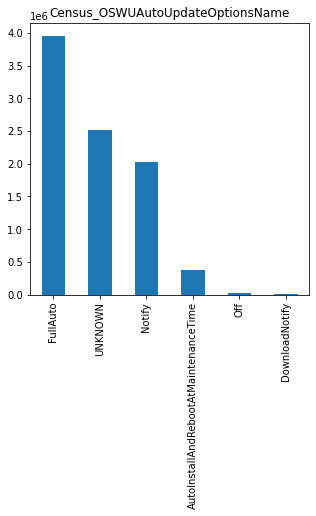

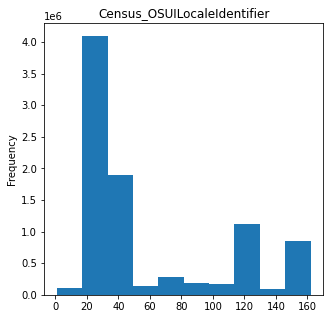

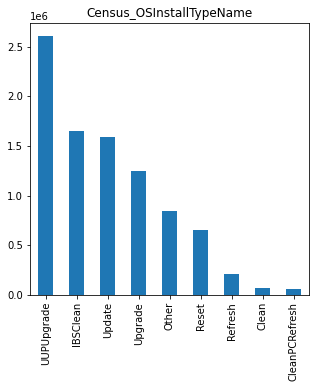

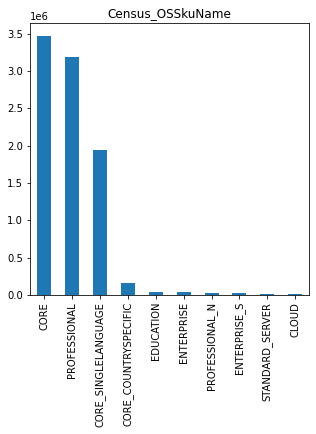

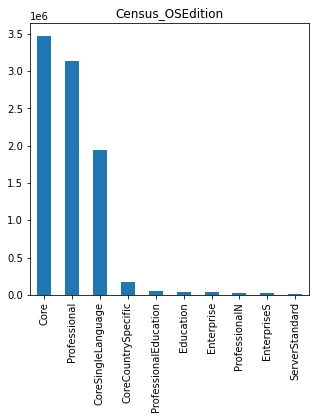

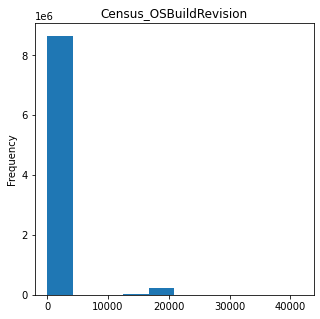

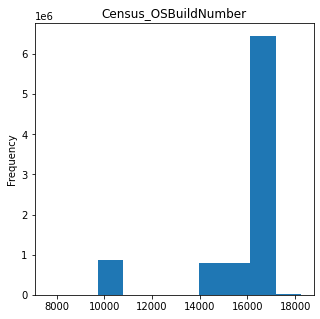

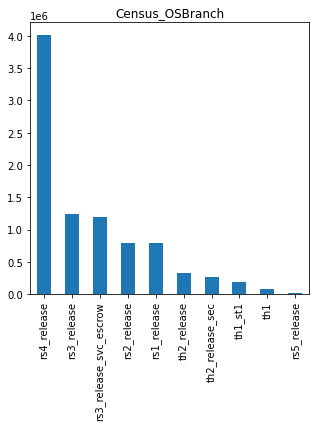

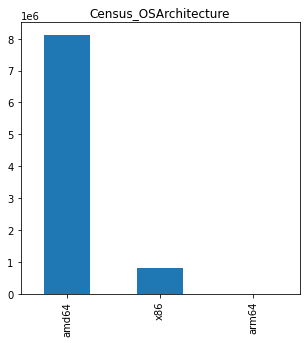

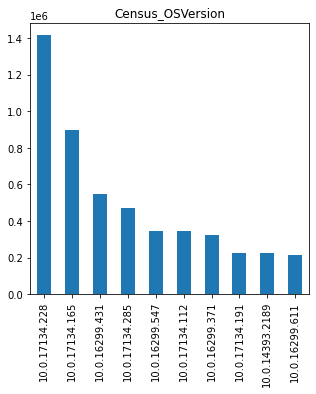

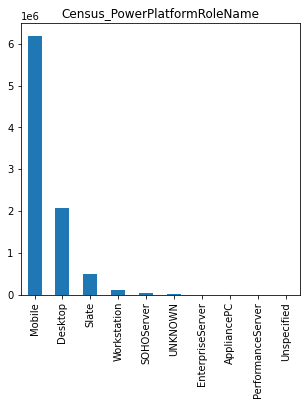

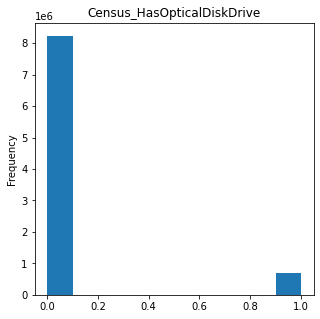

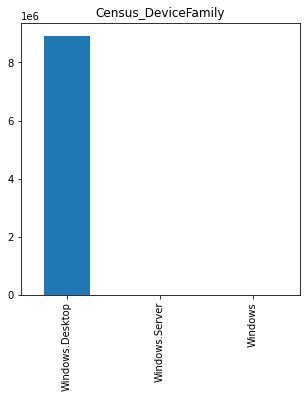

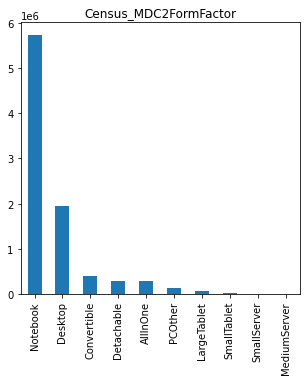

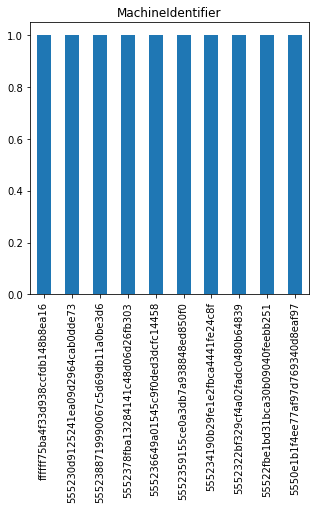

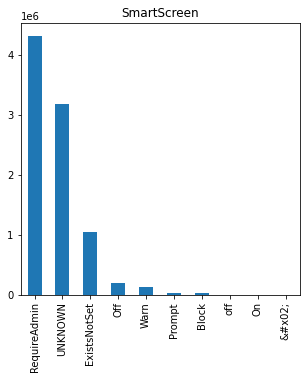

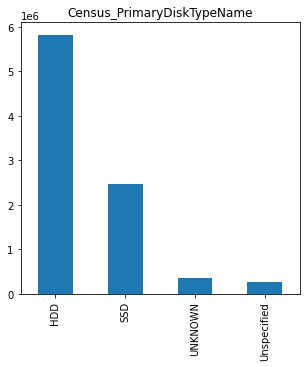

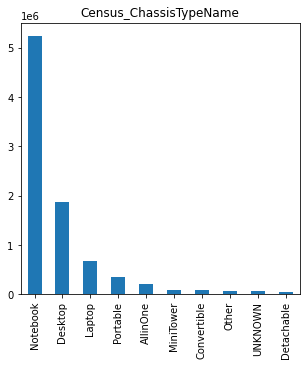

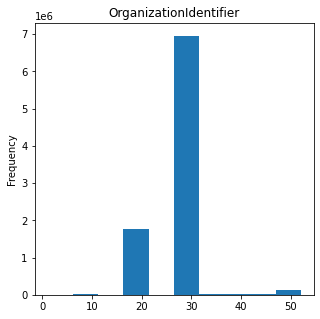

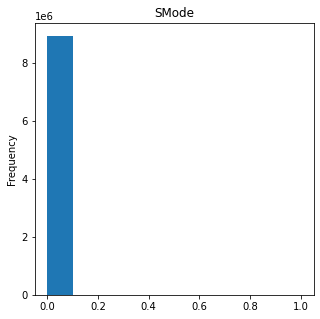

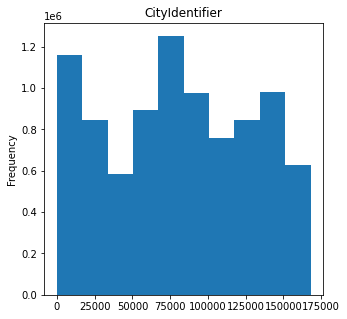

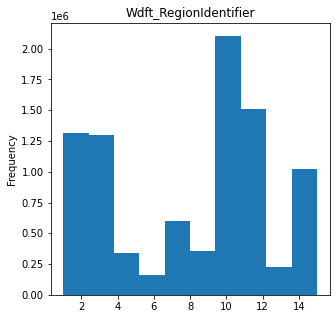

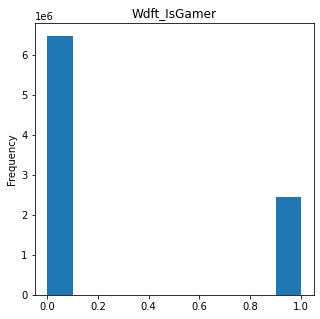

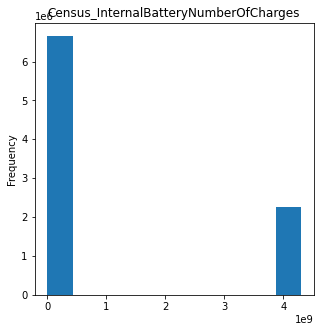

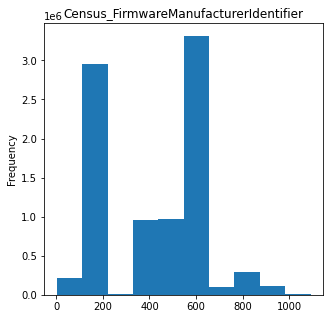

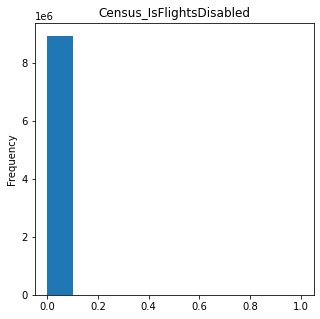

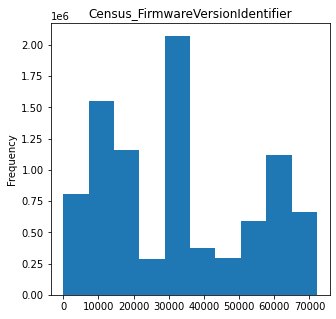

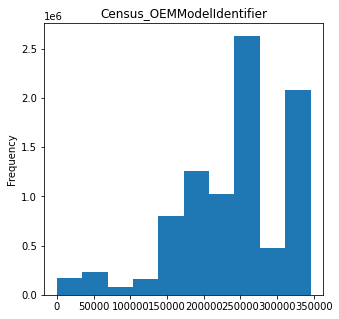

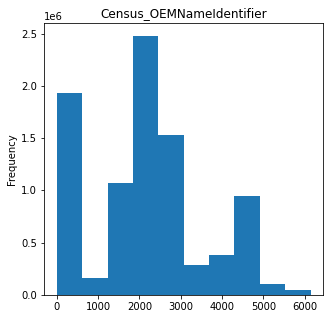

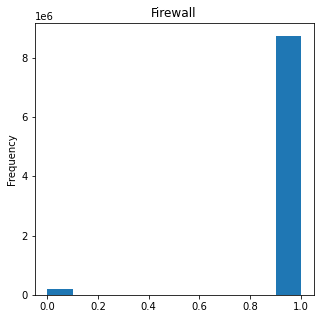

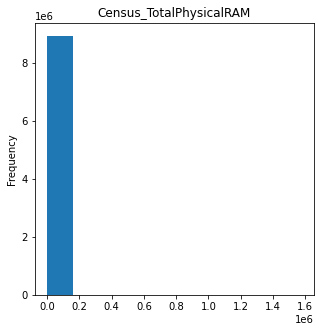

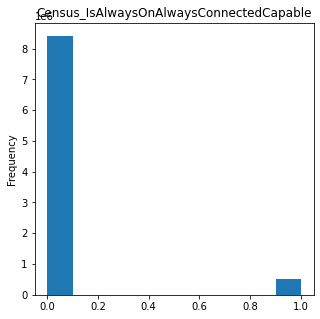

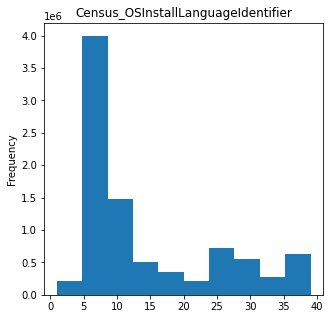

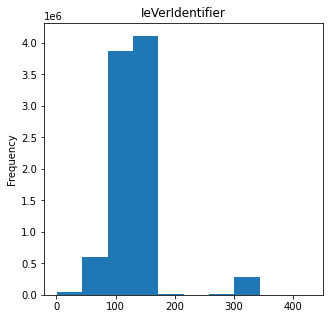

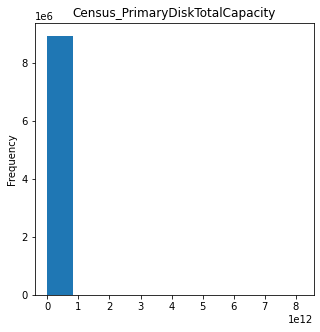

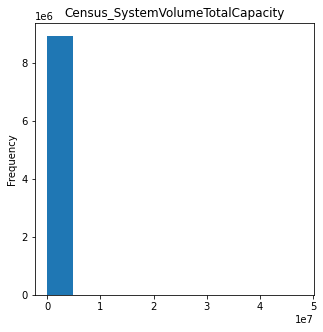

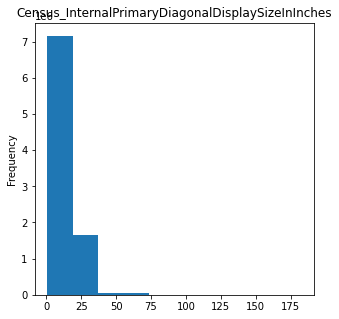

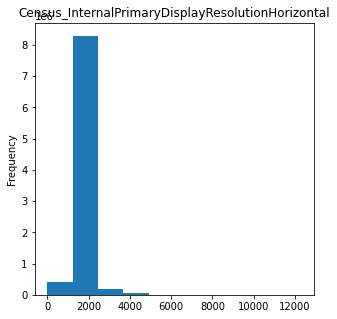

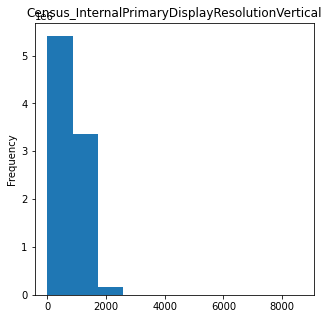

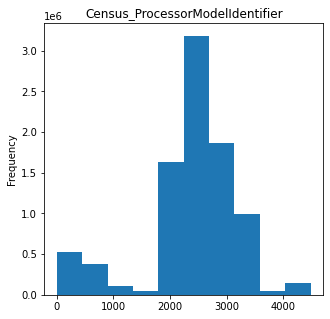

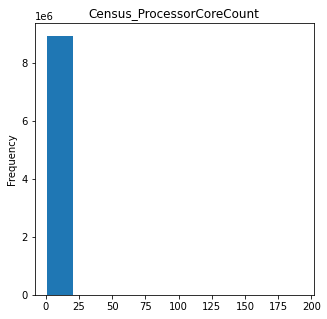

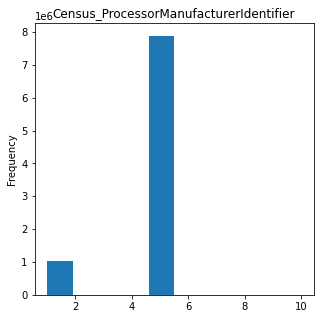

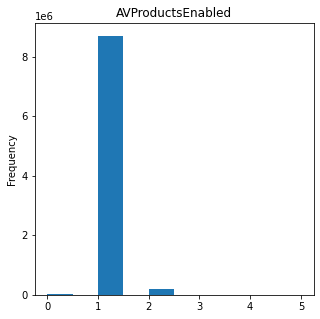

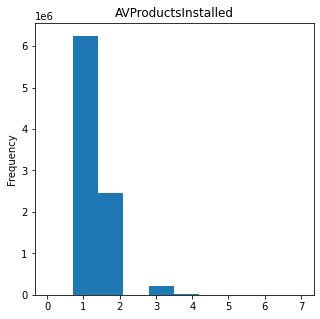

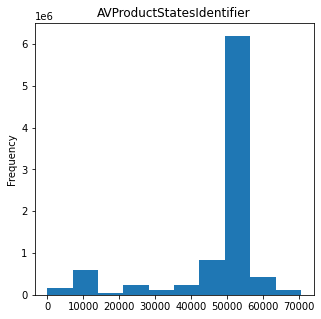

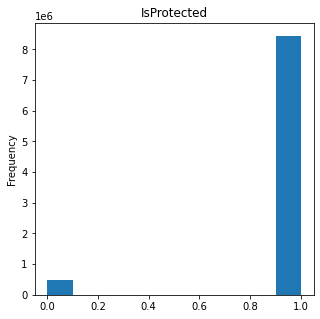

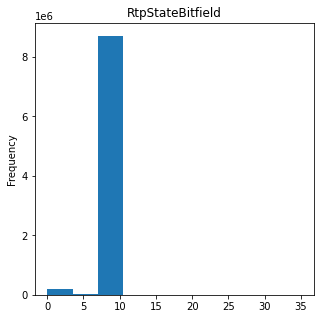

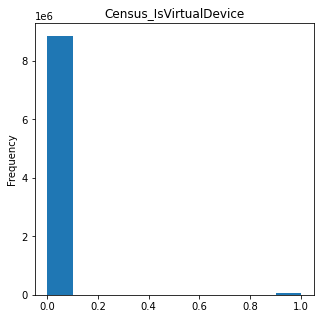

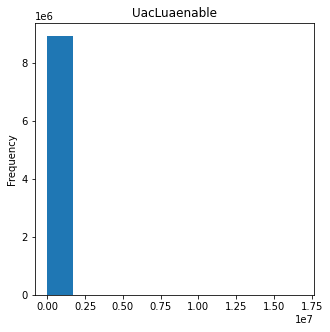

In [ ]:
for column in datasetCleanedPandas:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(datasetCleanedPandas[column]):
        datasetCleanedPandas[column].plot(kind = 'hist')
    else:
        datasetCleanedPandas[column].value_counts()[:10].plot(kind = 'bar')

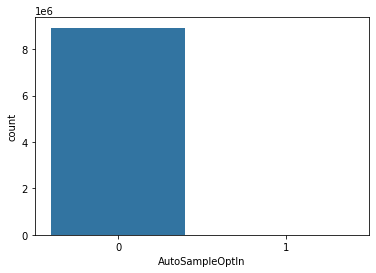

In [ ]:
sns.countplot(x='AutoSampleOptIn',data=datasetCleanedPandas)

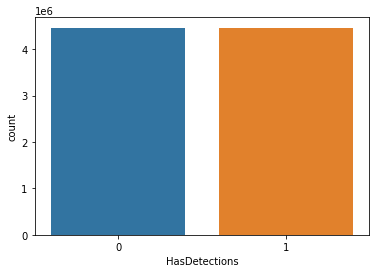

In [ ]:
sns.countplot(x='HasDetections',data=datasetCleanedPandas)

# **Multivariate analysis**

In [ ]:
correlation = datasetCleanedPandas.corr()

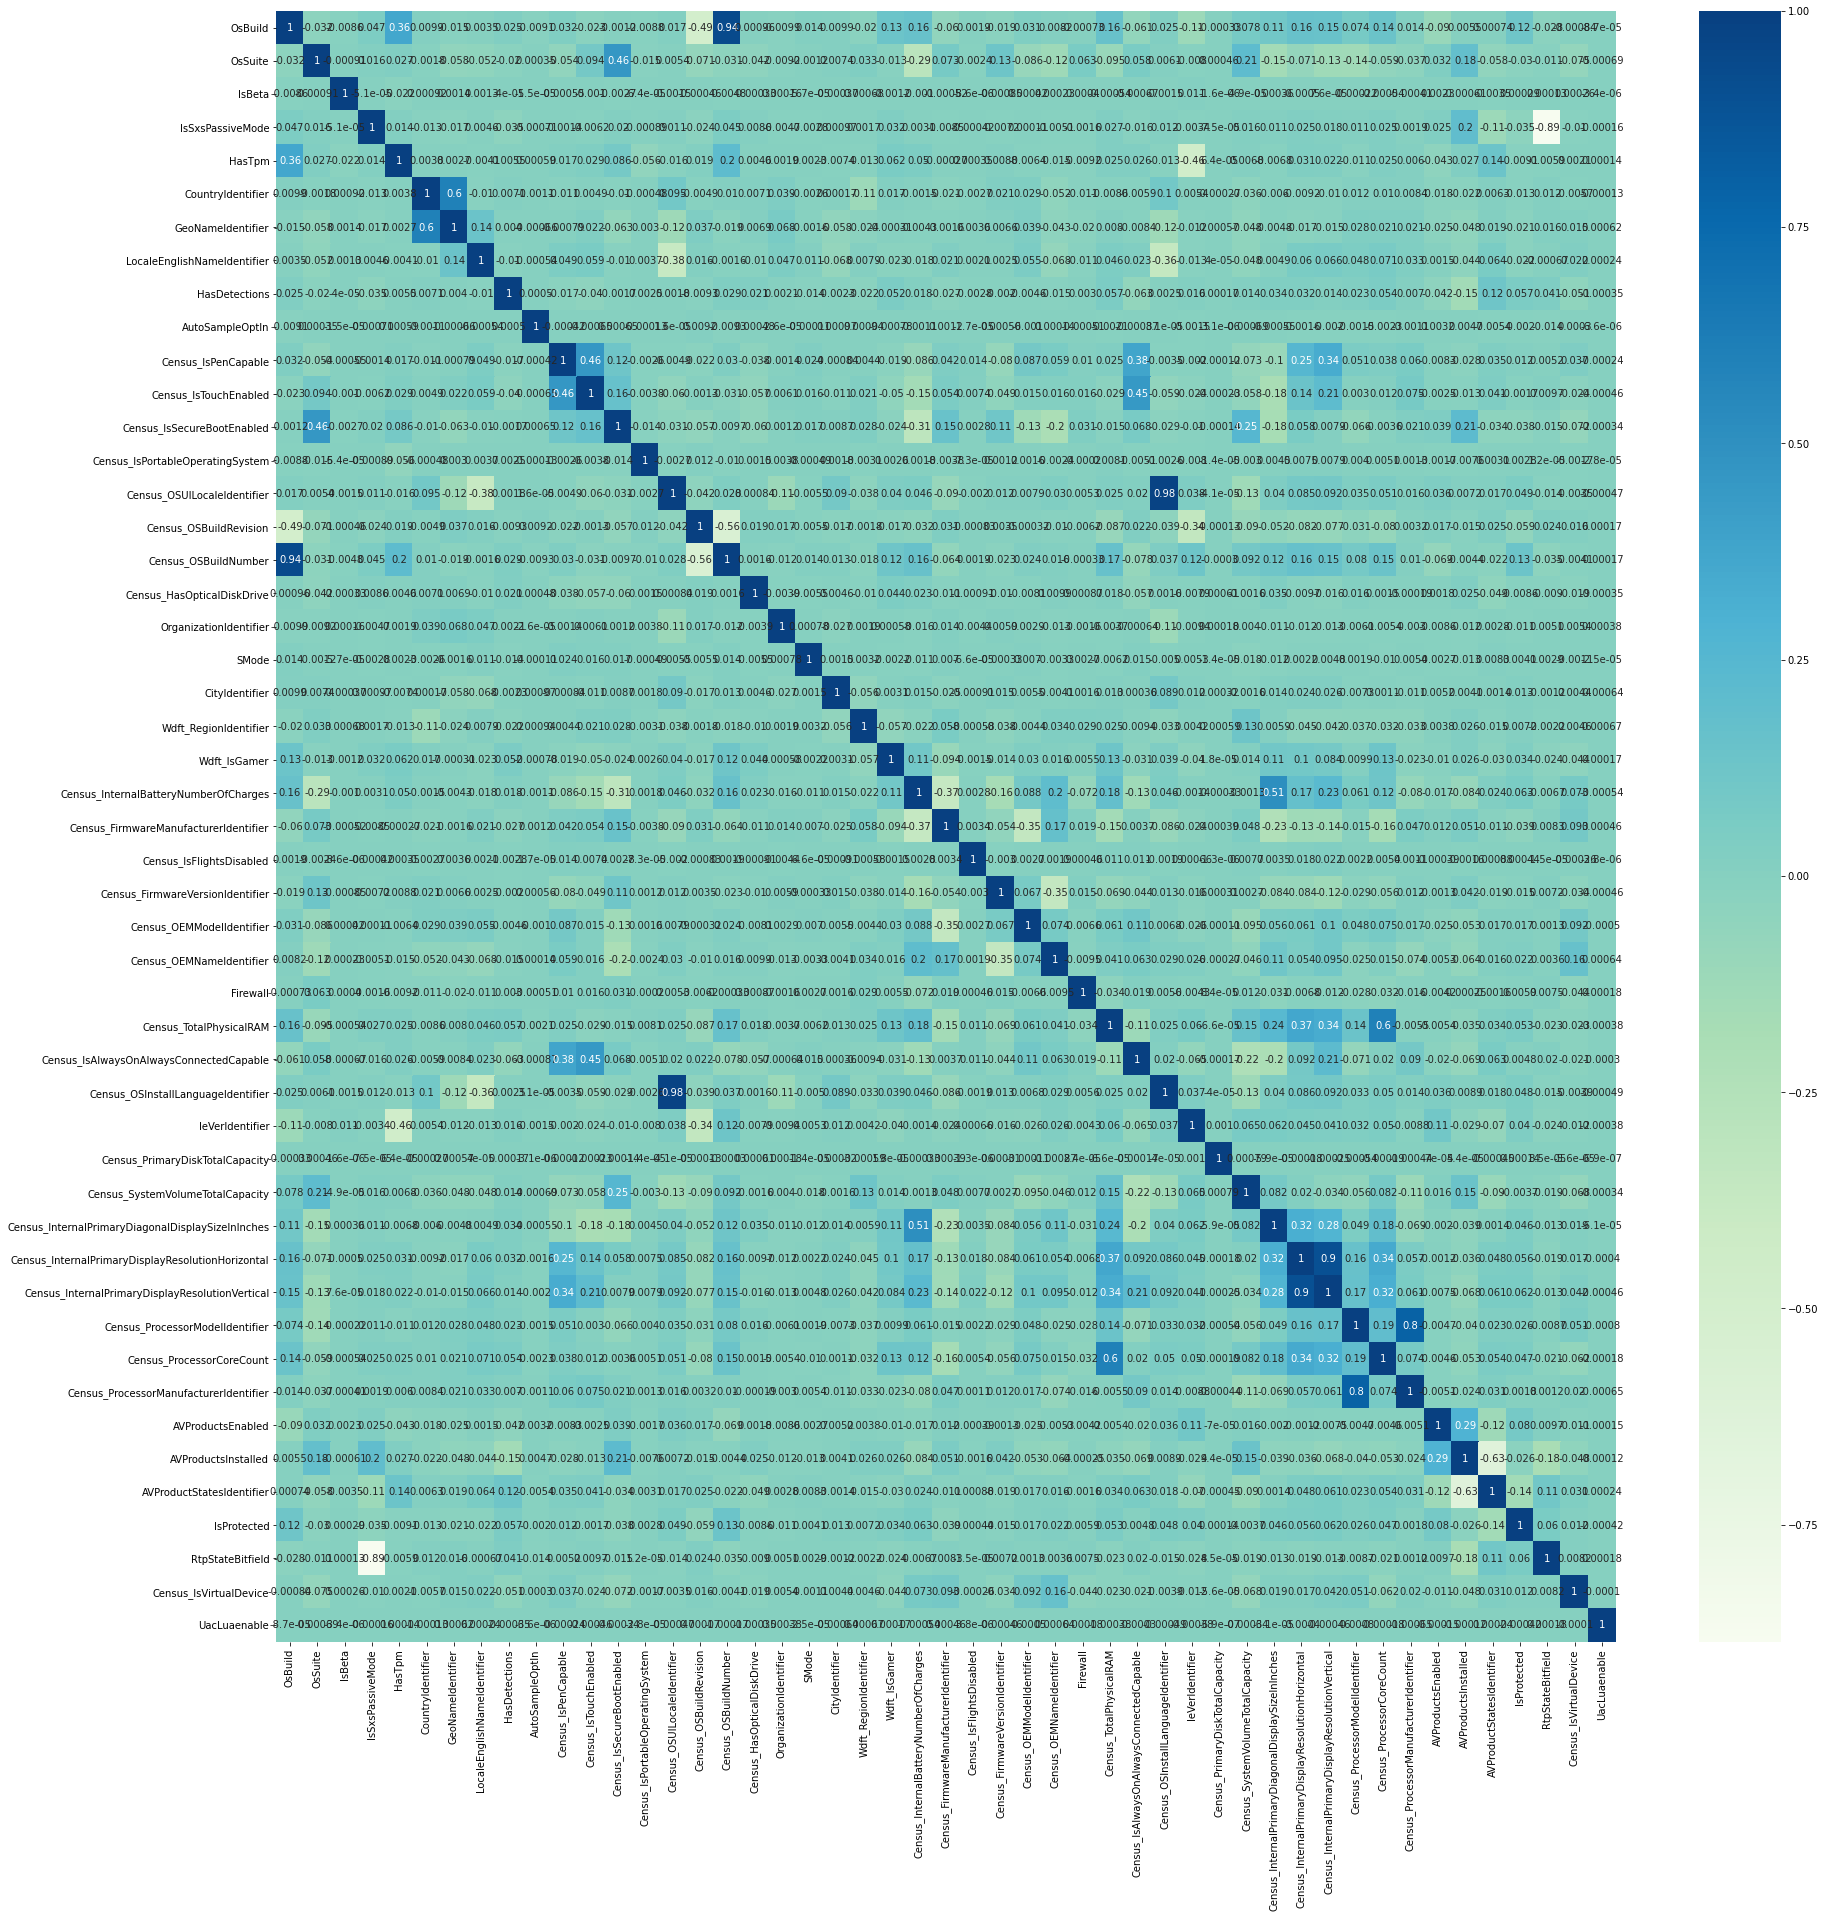

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation, cmap = "GnBu", annot = True)
plt.show()

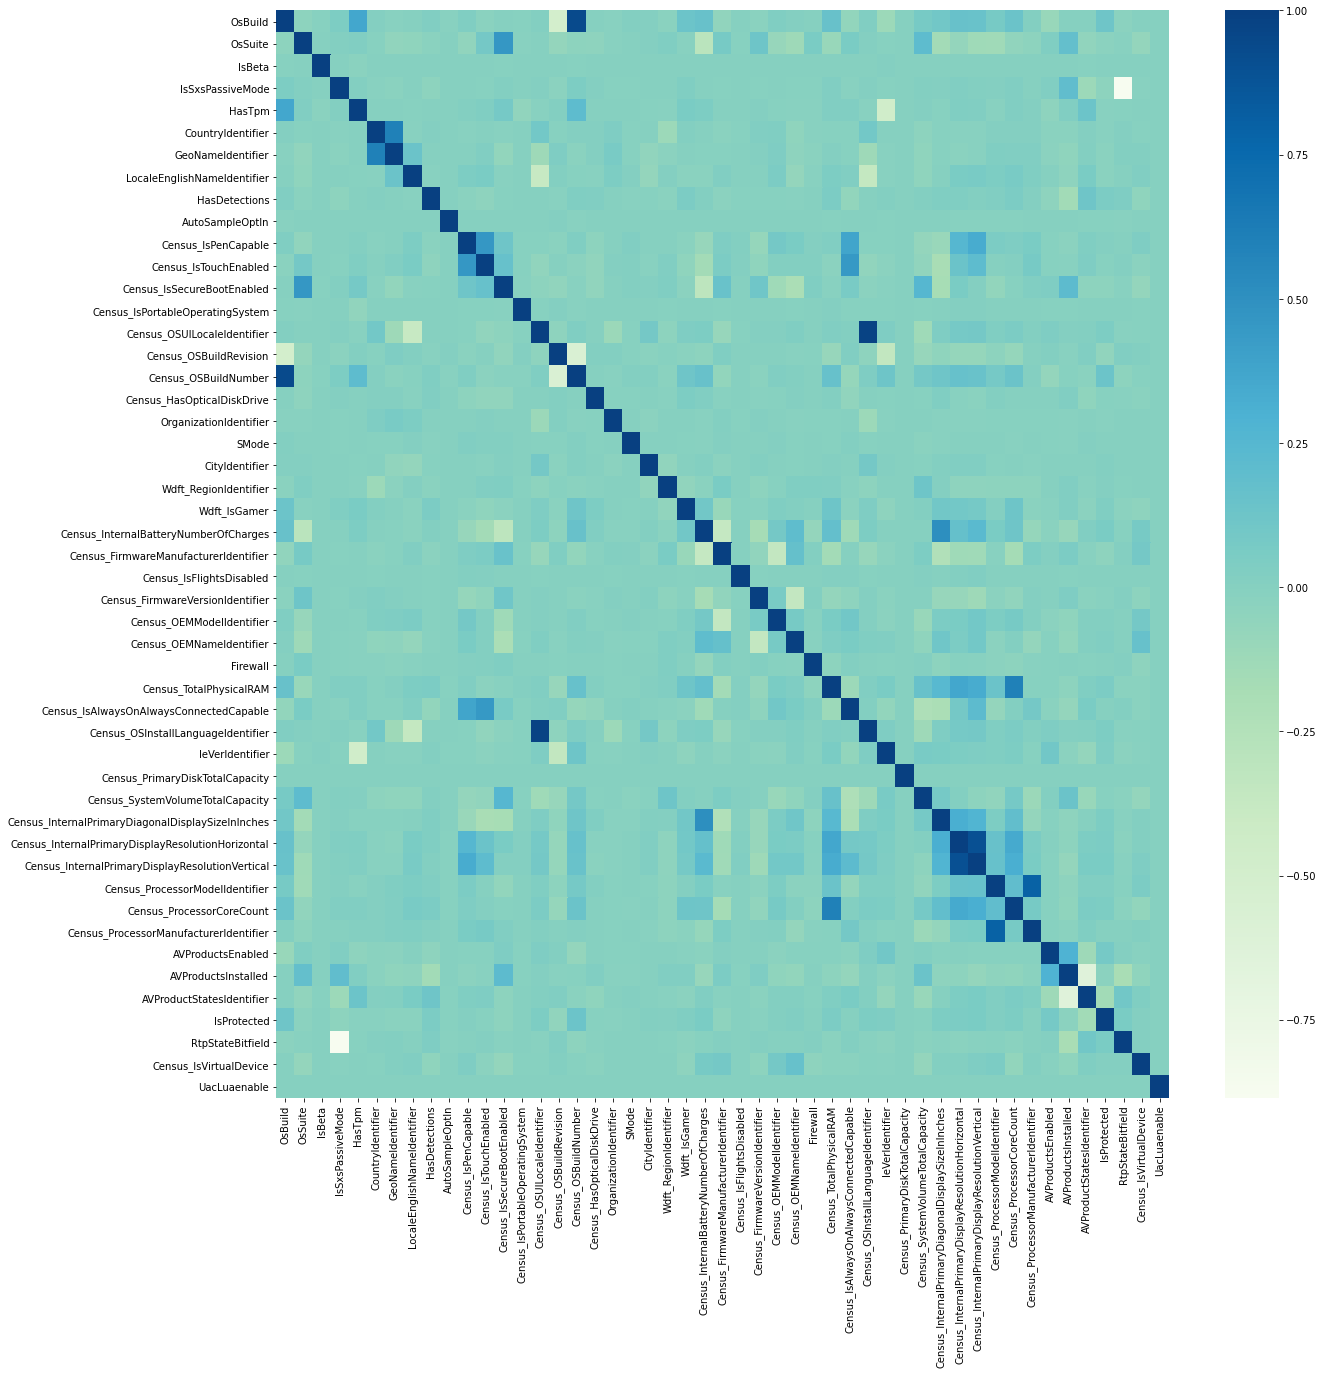

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap = "GnBu", annot = False)
plt.show()

In [ ]:
#Análisis estadístico
datasetCleanedPandas.info

<bound method DataFrame.info of       Processor  OsBuild  ... Census_IsVirtualDevice UacLuaenable
0           x64    17134  ...                    0.0          1.0
1           x64    17134  ...                    0.0          1.0
2           x64    17134  ...                    0.0          1.0
3           x64    17134  ...                    0.0          1.0
4           x64    17134  ...                    0.0          1.0
...         ...      ...  ...                    ...          ...
56690       x64    16299  ...                    0.0          1.0
56691       x86    10586  ...                    0.0          1.0
56692       x64    16299  ...                    0.0          1.0
56693       x64    15063  ...                    0.0          1.0
56694       x64    17134  ...                    0.0          1.0

[8921483 rows x 76 columns]>

In [ ]:
datasetCleanedPandas.describe(include='all')

,Processor,OsBuild,OsPlatformSubRelease,ProductName,EngineVersion,AppVersion,OsSuite,IsBeta,AvSigVersion,OsBuildLab,IsSxsPassiveMode,HasTpm,CountryIdentifier,GeoNameIdentifier,OsVer,LocaleEnglishNameIdentifier,Platform,HasDetections,SkuEdition,AutoSampleOptIn,Census_IsPenCapable,Census_IsTouchEnabled,Census_IsSecureBootEnabled,Census_FlightRing,Census_ActivationChannel,Census_GenuineStateName,Census_IsPortableOperatingSystem,Census_OSWUAutoUpdateOptionsName,Census_OSUILocaleIdentifier,Census_OSInstallTypeName,Census_OSSkuName,Census_OSEdition,Census_OSBuildRevision,Census_OSBuildNumber,Census_OSBranch,Census_OSArchitecture,Census_OSVersion,Census_PowerPlatformRoleName,Census_HasOpticalDiskDrive,Census_DeviceFamily,Census_MDC2FormFactor,MachineIdentifier,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName,OrganizationIdentifier,SMode,CityIdentifier,Wdft_RegionIdentifier,Wdft_IsGamer,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_IsFlightsDisabled,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_ProcessorModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,UacLuaenable
count,8921483,8.921483e+06,8921483,8921483,8921483,8921483,8.921483e+06,8.921483e+06,8921483,8921462,8.921483e+06,8.921483e+06,8.921483e+06,8921270.0,8921483,8.921483e+06,8921483,8.921483e+06,8921483,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483,8921483,8921483,8.921483e+06,8921483,8.921483e+06,8921483,8921483,8921483,8.921483e+06,8.921483e+06,8921483,8921483,8921483,8921428,8.921483e+06,8921483,8921483,8921483,8921483,8921483,8921483,8921483.0,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8921483.0,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8921483.0,8921483.0,8921483.0,8921483.0,8921483.0,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921483e+06
unique,3,NaN,9,6,70,110,NaN,NaN,8531,663,NaN,NaN,NaN,NaN,58,NaN,4,NaN,8,NaN,NaN,NaN,NaN,10,6,5,NaN,6,NaN,9,30,33,NaN,NaN,32,3,469,10,NaN,3,13,8921483,22,4,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,x64,NaN,rs4,win8defender,1.1.15200.1,4.18.1807.18075,NaN,NaN,1.273.1420.0,17134.1.amd64fre.rs4_release.180410-1804,NaN,NaN,NaN,NaN,10.0.0.0,NaN,windows10,NaN,Home,NaN,NaN,NaN,NaN,Retail,Retail,IS_GENUINE,NaN,FullAuto,NaN,UUPUpgrade,CORE,Core,NaN,NaN,rs4_release,amd64,10.0.17134.228,Mobile,NaN,Windows.Desktop,Notebook,ffffff75ba4f33d938ccfdb148b8ea16,RequireAdmin,HDD,Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8105435,NaN,3915526,8826520,3845067,5139224,NaN,NaN,102317,3658199,NaN,NaN,NaN,NaN,8632545,NaN,8618715,NaN,5514341,NaN,NaN,NaN,NaN,8355679,4727589,7877597,NaN,3954497,NaN,2608037,3469869,3469991,NaN,NaN,4009158,8105885,1413627,6182908,NaN,8907053,5723319,1,4316183,5806804,5248812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.571997e+04,NaN,NaN,NaN,NaN,5.751534e+02,7.509962e-06,NaN,NaN,1.733378e-02,9.879711e-01,1.080490e+02,NaN,NaN,2.790453e+01,NaN,4.997927e-01,NaN,2.891896e-05,3.807091e-02,1.255431e-01,4.860229e-01,NaN,NaN,NaN,5.452008e-04,NaN,6.046534e+01,NaN,NaN,NaN,9.730490e+02,1.583483e+04,NaN,NaN,NaN,NaN,7.718728e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.370

# **Data preparation**

# Data cleaning: Correlated variables

In [ ]:
#Correlations between HasDetections and the others variables
corrTarget = datasetCleanedPandas.corrwith(datasetCleanedPandas["HasDetections"])
corrTarget = corrTarget.sort_values(ascending=False)
for var,cor in corrTarget.items():
    print(f"{var}: {cor} ")

HasDetections: 1.0 
AVProductStatesIdentifier: 0.1167262713953306 
Census_TotalPhysicalRAM: 0.057018569558003225 
IsProtected: 0.056682122875775405 
Census_ProcessorCoreCount: 0.05417529472193518 
Wdft_IsGamer: 0.051720727993150736 
RtpStateBitfield: 0.041358154819393006 
Census_InternalPrimaryDiagonalDisplaySizeInInches: 0.0341249425138332 
Census_InternalPrimaryDisplayResolutionHorizontal: 0.031760654446595274 
Census_OSBuildNumber: 0.029485529201186217 
OsBuild: 0.024754269838123923 
Census_ProcessorModelIdentifier: 0.02272053594604107 
Census_HasOpticalDiskDrive: 0.020841530777244103 
Census_InternalBatteryNumberOfCharges: 0.018431067220670835 
IeVerIdentifier: 0.015851719799848913 
Census_SystemVolumeTotalCapacity: 0.014327714033832694 
Census_InternalPrimaryDisplayResolutionVertical: 0.01380923801061571 
CountryIdentifier: 0.007098899040655736 
Census_ProcessorManufacturerIdentifier: 0.0070061840081432365 
HasTpm: 0.005490073447117701 
GeoNameIdentifier: 0.003975120781283614 
Fir

In [ ]:
#Drop the variables with lowest correlation
varLC = ['OsBuild','Census_OSUILocaleIdentifier','Census_InternalPrimaryDisplayResolutionVertical','Census_ProcessorManufacturerIdentifier']
datasetV4 = datasetCleanedPandas.drop(varLC, axis=1)

In [ ]:
#Verify the dataset
#Must be: (8921483, 72)
datasetV4.shape

(8921483, 72)

In [ ]:
correlation = datasetV4.corr()

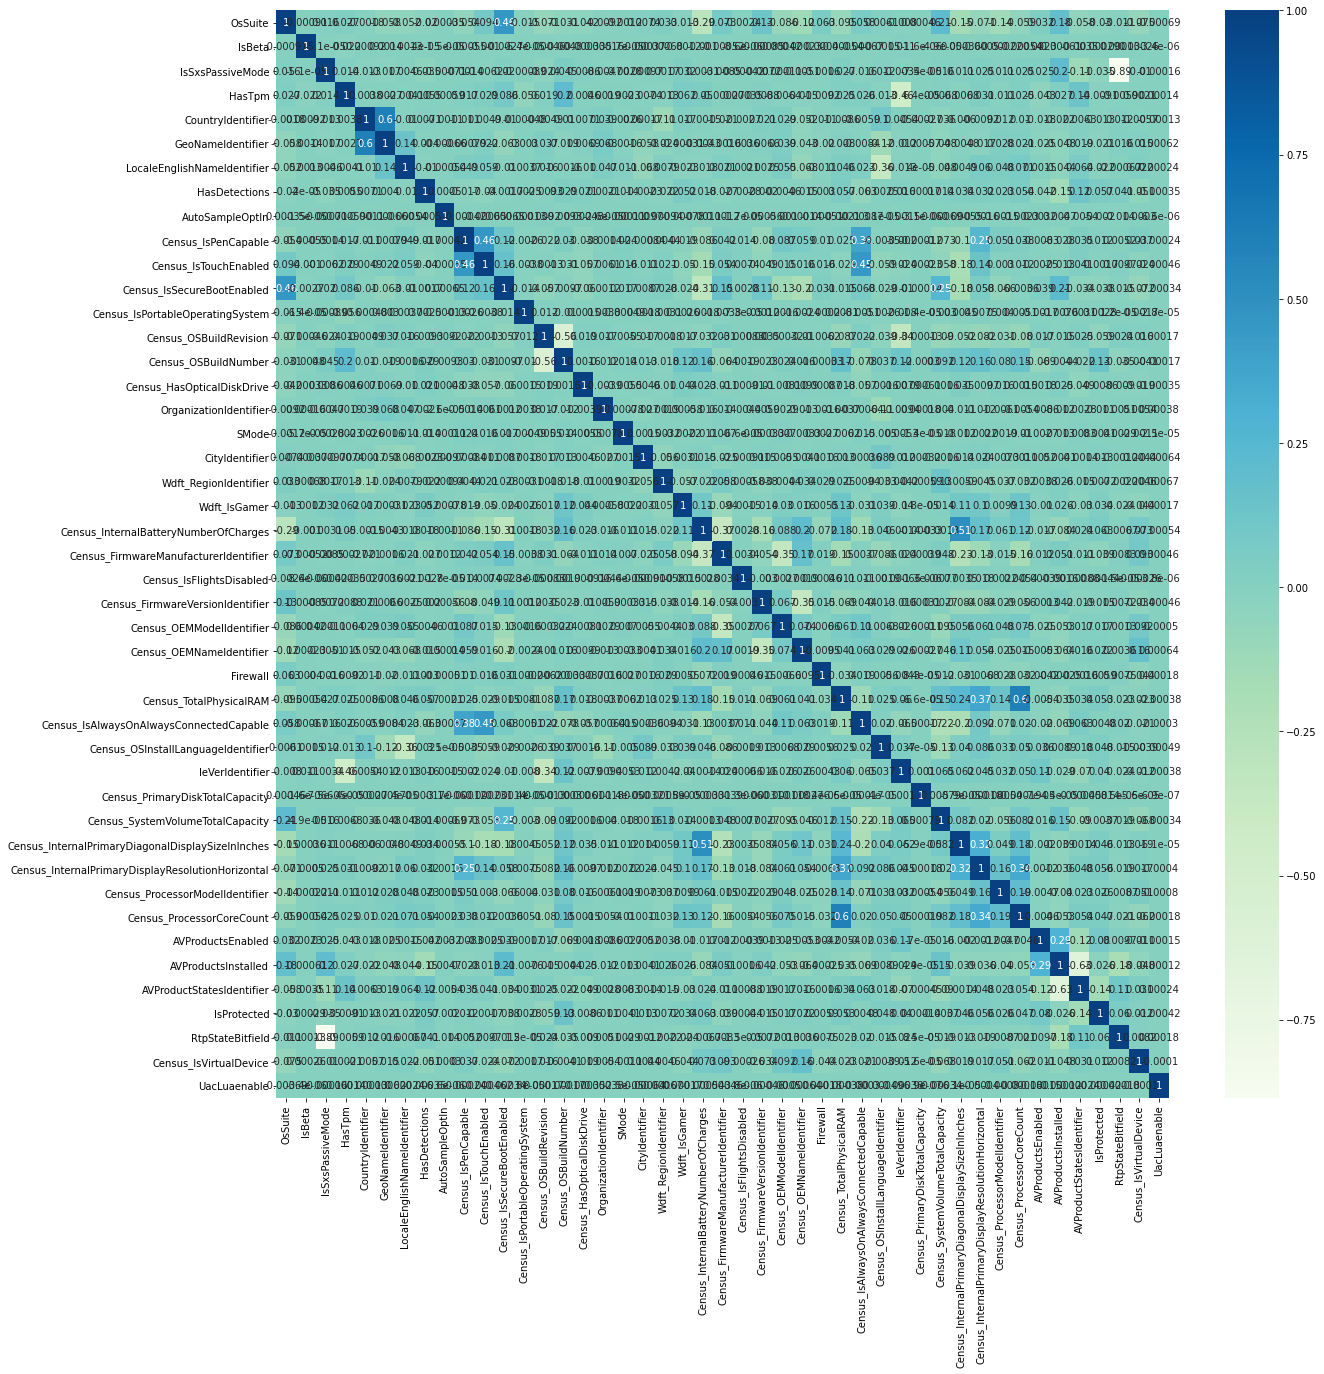

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cmap = "GnBu", annot = True)
plt.show()

# Data formatting

Label encoding

In [ ]:
#Select categorical variables
#There are: 45 numeric and 27 categorical variables
i = 0
catVarListV4 = []
numVarListV4 = []
for var in datasetV4:
    if (is_numeric_dtype(datasetV4[var])):
        numVarListV4.append(var)
    else:
        catVarListV4.append(var)
        i = i + 1
catVarV4 = datasetV4[catVarListV4]
numVarV4 = datasetV4[numVarListV4]

In [ ]:
#Label encoding
finalCatVar = catVarV4.apply(lambda var: var.cat.codes)

In [ ]:
finalCatVar.head()

,Processor,OsPlatformSubRelease,ProductName,EngineVersion,AppVersion,AvSigVersion,OsBuildLab,OsVer,Platform,SkuEdition,Census_FlightRing,Census_ActivationChannel,Census_GenuineStateName,Census_OSWUAutoUpdateOptionsName,Census_OSInstallTypeName,Census_OSSkuName,Census_OSEdition,Census_OSBranch,Census_OSArchitecture,Census_OSVersion,Census_PowerPlatformRoleName,Census_DeviceFamily,Census_MDC2FormFactor,MachineIdentifier,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName
0,1,4,1,32,27,836,131,0,0,6,3,2,1,5,6,10,10,5,0,153,1,0,2,0,21,0,3
1,1,4,1,22,17,259,131,0,0,6,1,2,2,5,2,10,10,5,0,150,3,0,7,1,21,0,12
2,1,4,1,32,27,714,131,0,0,4,3,1,1,2,6,1,1,5,0,153,1,0,2,2,5,1,3
3,1,4,1,32,27,760,131,0,0,6,3,1,1,2,6,10,10,5,0,156,1,0,2,3,1,2,11
4,1,4,1,32,27,723,131,0,0,4,3,2,1,2,7,1,1,5,0,155,3,0,7,4,5,0,14


In [ ]:
def convert_types(df):
    # Convert data types to reduce memory
    for c in df:
        col_type = str(df[c].dtypes)
        numerics = ['int8','int16', 'int32', 'int64', 'float8', 'float16', 'float32', 'float64']
        
        # Convert objects to category
        if col_type == 'object':
            df[c] = df[c].astype('category')
        
        # numerics
        elif col_type in numerics:
            c_min = df[c].min()
            c_max = df[c].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)  
        
    return df

In [ ]:
#Create a new dataset with "finalCatVar"
auxDatasetV5 = pd.concat([finalCatVar,numVarV4], axis=1)

In [ ]:
#Verify the dataset
#Must be: (8921483, 72)
auxDatasetV5.shape

(8921483, 72)

In [ ]:
auxDatasetV5.head()

,Processor,OsPlatformSubRelease,ProductName,EngineVersion,AppVersion,AvSigVersion,OsBuildLab,OsVer,Platform,SkuEdition,Census_FlightRing,Census_ActivationChannel,Census_GenuineStateName,Census_OSWUAutoUpdateOptionsName,Census_OSInstallTypeName,Census_OSSkuName,Census_OSEdition,Census_OSBranch,Census_OSArchitecture,Census_OSVersion,Census_PowerPlatformRoleName,Census_DeviceFamily,Census_MDC2FormFactor,MachineIdentifier,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName,OsSuite,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,HasDetections,AutoSampleOptIn,Census_IsPenCapable,Census_IsTouchEnabled,Census_IsSecureBootEnabled,Census_IsPortableOperatingSystem,Census_OSBuildRevision,Census_OSBuildNumber,Census_HasOpticalDiskDrive,OrganizationIdentifier,SMode,CityIdentifier,Wdft_RegionIdentifier,Wdft_IsGamer,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_IsFlightsDisabled,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_ProcessorModelIdentifier,Census_ProcessorCoreCount,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,UacLuaenable
0,1,4,1,32,27,836,131,0,0,6,3,2,1,5,6,10,10,5,0,153,1,0,2,0,6,0,3,256,0,0,1,29,35.0,-85,0,0,0,0,0,0,165,17134,0,18.0,0.0,128035.0,10.0,0.0,4.294967e+09,628.0,0.0,36144.0,9124.0,2668.0,1.0,4096.0,0.0,26.0,137.0,476940.0,299451.0,18.906250,1440.0,2340.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
1,1,4,1,22,17,259,131,0,0,6,1,2,2,5,2,10,10,5,0,150,3,0,7,1,6,0,12,256,0,0,1,93,119.0,64,0,0,0,0,0,0,1,17134,0,18.0,0.0,1482.0,8.0,0.0,1.000000e+00,628.0,0.0,57858.0,91656.0,2668.0,1.0,4096.0,0.0,8.0,137.0,476940.0,102385.0,13.898438,1366.0,2404.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
2,1,4,1,32,27,714,131,0,0,4,3,1,1,2,6,1,1,5,0,153,1,0,2,2,5,1,3,768,0,0,1,86,64.0,49,0,0,0,0,0,0,165,17134,0,18.0,0.0,153579.0,3.0,0.0,4.294967e+09,142.0,0.0,52682.0,317701.0,4908.0,1.0,4096.0,0.0,7.0,137.0,114473.0,113907.0,21.500000,1920.0,1972.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
3,1,4,1,32,27,760,131,0,0,6,3,1,1,2,6,10,10,5,0,156,1,0,2,3,1,2,11,256,0,0,1,88,117.0,115,1,0,0,0,0,0,228,17134,0,27.0,0.0,20710.0,3.0,0.0,4.294967e+09,355.0,0.0,20050.0,275890.0,1443.0,1.0,4096.0,0.0,17.0,137.0,238475.0,227116.0,18.500000,1366.0,2272.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
4,1,4,1,32,27,723,131,0,0,4,3,2,1,2,7,1,1,5,0,155,3,0,7,4,5,0,14,768,0,0,1,18,277.0,75,1,0,0,0,0,0,191,17134,0,27.0,0.0,37376.0,1.0,0.0,0.000000e+00,355.0,0.0,19844.0,331929.0,1443.0,1.0,6144.0,0.0,8.0,137.0,476940.0,101900.0,14.000000,1366.0,2500.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0


In [ ]:
#Change for better types
datasetV5 = convert_types(auxDatasetV5)
datasetV5.dtypes

Processor                       int8
OsPlatformSubRelease            int8
ProductName                     int8
EngineVersion                   int8
AppVersion                      int8
                              ...   
AVProductStatesIdentifier    float32
IsProtected                  float16
RtpStateBitfield             float16
Census_IsVirtualDevice       float16
UacLuaenable                 float32
Length: 72, dtype: object

In [ ]:
datasetV5.head()

,Processor,OsPlatformSubRelease,ProductName,EngineVersion,AppVersion,AvSigVersion,OsBuildLab,OsVer,Platform,SkuEdition,Census_FlightRing,Census_ActivationChannel,Census_GenuineStateName,Census_OSWUAutoUpdateOptionsName,Census_OSInstallTypeName,Census_OSSkuName,Census_OSEdition,Census_OSBranch,Census_OSArchitecture,Census_OSVersion,Census_PowerPlatformRoleName,Census_DeviceFamily,Census_MDC2FormFactor,MachineIdentifier,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName,OsSuite,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,HasDetections,AutoSampleOptIn,Census_IsPenCapable,Census_IsTouchEnabled,Census_IsSecureBootEnabled,Census_IsPortableOperatingSystem,Census_OSBuildRevision,Census_OSBuildNumber,Census_HasOpticalDiskDrive,OrganizationIdentifier,SMode,CityIdentifier,Wdft_RegionIdentifier,Wdft_IsGamer,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_IsFlightsDisabled,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_ProcessorModelIdentifier,Census_ProcessorCoreCount,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,UacLuaenable
0,1,4,1,32,27,836,131,0,0,6,3,2,1,5,6,10,10,5,0,153,1,0,2,0,6,0,3,256,0,0,1,29,35.0,-85,0,0,0,0,0,0,165,17134,0,18.0,0.0,128035.0,10.0,0.0,4.294967e+09,628.0,0.0,36144.0,9124.0,2668.0,1.0,4096.0,0.0,26.0,137.0,476940.0,299451.0,18.906250,1440.0,2340.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
1,1,4,1,22,17,259,131,0,0,6,1,2,2,5,2,10,10,5,0,150,3,0,7,1,6,0,12,256,0,0,1,93,119.0,64,0,0,0,0,0,0,1,17134,0,18.0,0.0,1482.0,8.0,0.0,1.000000e+00,628.0,0.0,57858.0,91656.0,2668.0,1.0,4096.0,0.0,8.0,137.0,476940.0,102385.0,13.898438,1366.0,2404.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
2,1,4,1,32,27,714,131,0,0,4,3,1,1,2,6,1,1,5,0,153,1,0,2,2,5,1,3,768,0,0,1,86,64.0,49,0,0,0,0,0,0,165,17134,0,18.0,0.0,153579.0,3.0,0.0,4.294967e+09,142.0,0.0,52682.0,317701.0,4908.0,1.0,4096.0,0.0,7.0,137.0,114473.0,113907.0,21.500000,1920.0,1972.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
3,1,4,1,32,27,760,131,0,0,6,3,1,1,2,6,10,10,5,0,156,1,0,2,3,1,2,11,256,0,0,1,88,117.0,115,1,0,0,0,0,0,228,17134,0,27.0,0.0,20710.0,3.0,0.0,4.294967e+09,355.0,0.0,20050.0,275890.0,1443.0,1.0,4096.0,0.0,17.0,137.0,238475.0,227116.0,18.500000,1366.0,2272.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0
4,1,4,1,32,27,723,131,0,0,4,3,2,1,2,7,1,1,5,0,155,3,0,7,4,5,0,14,768,0,0,1,18,277.0,75,1,0,0,0,0,0,191,17134,0,27.0,0.0,37376.0,1.0,0.0,0.000000e+00,355.0,0.0,19844.0,331929.0,1443.0,1.0,6144.0,0.0,8.0,137.0,476940.0,101900.0,14.000000,1366.0,2500.0,4.0,1.0,1.0,53447.0,1.0,7.0,0.0,1.0


In [ ]:
def minmax_norm(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        del max_value, min_value
    return result

Normalization

In [ ]:
#Normalization of dataset structure
datasetV6 = minmax_norm(datasetV5)

In [ ]:
datasetV6.head()

,Processor,OsPlatformSubRelease,ProductName,EngineVersion,AppVersion,AvSigVersion,OsBuildLab,OsVer,Platform,SkuEdition,Census_FlightRing,Census_ActivationChannel,Census_GenuineStateName,Census_OSWUAutoUpdateOptionsName,Census_OSInstallTypeName,Census_OSSkuName,Census_OSEdition,Census_OSBranch,Census_OSArchitecture,Census_OSVersion,Census_PowerPlatformRoleName,Census_DeviceFamily,Census_MDC2FormFactor,MachineIdentifier,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName,OsSuite,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,HasDetections,AutoSampleOptIn,Census_IsPenCapable,Census_IsTouchEnabled,Census_IsSecureBootEnabled,Census_IsPortableOperatingSystem,Census_OSBuildRevision,Census_OSBuildNumber,Census_HasOpticalDiskDrive,OrganizationIdentifier,SMode,CityIdentifier,Wdft_RegionIdentifier,Wdft_IsGamer,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_IsFlightsDisabled,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_ProcessorModelIdentifier,Census_ProcessorCoreCount,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,UacLuaenable
0,0.5,0.5,0.199951,0.463867,0.247681,0.098022,0.199097,0.0,0.0,0.856934,0.333252,0.399902,0.25,1.000000,0.750,0.344727,0.31250,0.161255,0.0,0.326904,0.199951,0.0,0.166626,0.000000e+00,0.285645,0.000000,0.058838,0.312500,0.0,0.0,1.0,0.126709,0.115234,0.168579,0.0,0.0,0.0,0.0,0.0,0.0,0.003952,0.895508,0.0,0.333252,0.0,0.762207,0.643066,0.0,1.0,0.574219,0.0,0.501465,0.026413,0.434326,1.0,0.002443,0.0,0.657715,0.317871,5.960464e-08,0.006279,0.100281,0.117249,0.521973,0.015701,0.199951,0.142822,0.757812,1.0,0.199951,0.0,5.960464e-08
1,0.5,0.5,0.199951,0.318848,0.156006,0.030365,0.199097,0.0,0.0,0.856934,0.111084,0.399902,0.50,1.000000,0.250,0.344727,0.31250,0.161255,0.0,0.320557,0.399902,0.0,0.583496,1.192093e-07,0.285645,0.000000,0.235352,0.312500,0.0,0.0,1.0,0.416260,0.399902,0.752930,0.0,0.0,0.0,0.0,0.0,0.0,0.000024,0.895508,0.0,0.333252,0.0,0.008797,0.500000,0.0,0.0,0.574219,0.0,0.802246,0.265381,0.434326,1.0,0.002443,0.0,0.184204,0.317871,5.960464e-08,0.002148,0.072693,0.111267,0.536133,0.015701,0.199951,0.142822,0.757812,1.0,0.199951,0.0,5.960464e-08
2,0.5,0.5,0.199951,0.463867,0.247681,0.083679,0.199097,0.0,0.0,0.571289,0.333252,0.199951,0.25,0.399902,0.750,0.034485,0.03125,0.161255,0.0,0.326904,0.199951,0.0,0.166626,2.384186e-07,0.238037,0.333252,0.058838,0.979004,0.0,0.0,1.0,0.384521,0.213501,0.694336,0.0,0.0,0.0,0.0,0.0,0.0,0.003952,0.895508,0.0,0.333252,0.0,0.914551,0.142822,0.0,1.0,0.128418,0.0,0.730469,0.919434,0.798828,1.0,0.002443,0.0,0.157837,0.317871,0.000000e+00,0.002388,0.114563,0.156372,0.439697,0.015701,0.199951,0.142822,0.757812,1.0,0.199951,0.0,5.960464e-08
3,0.5,0.5,0.199951,0.463867,0.247681,0.089111,0.199097,0.0,0.0,0.856934,0.333252,0.199951,0.25,0.399902,0.750,0.344727,0.31250,0.161255,0.0,0.333252,0.199951,0.0,0.166626,3.576279e-07,0.047607,0.666504,0.215698,0.312500,0.0,0.0,1.0,0.393555,0.393311,0.953125,1.0,0.0,0.0,0.0,0.0,0.0,0.005463,0.895508,0.0,0.509766,0.0,0.123291,0.142822,0.0,1.0,0.323975,0.0,0.278076,0.798340,0.234741,1.0,0.002443,0.0,0.421143,0.317871,0.000000e+00,0.004761,0.098083,0.111267,0.506836,0.015701,0.199951,0.142822,0.757812,1.0,0.199951,0.0,5.960464e-08
4,0.5,0.5,0.199951,0.463867,0.247681,0.084778,0.199097,0.0,0.0,0.571289,0.333252,0.399902,0.25,0.399902,0.875,0.034485,0.03125,0.161255,0.0,0.331299,0.399902,0.0,0.583496,4.768372e-07,0.238037,0.000000,0.274414,0.979004,0.0,0.0,1.0,0.076904,0.935547,0.795898,1.0,0.0,0.0,0.0,0.0,0.0,0.004578,0.895508,0.0,0.509766,0.0,0.222534,0.00000

In [ ]:
#Change for better types
datasetV6 = convert_types(datasetV6)
dtypes3 = datasetV6.dtypes
dtypes3

Processor                    float16
OsPlatformSubRelease         float16
ProductName                  float16
EngineVersion                float16
AppVersion                   float16
                              ...   
AVProductStatesIdentifier    float16
IsProtected                  float16
RtpStateBitfield             float16
Census_IsVirtualDevice       float16
UacLuaenable                 float16
Length: 72, dtype: object

In [ ]:
datasetV6.describe(include="all")

,Processor,OsPlatformSubRelease,ProductName,EngineVersion,AppVersion,AvSigVersion,OsBuildLab,OsVer,Platform,SkuEdition,Census_FlightRing,Census_ActivationChannel,Census_GenuineStateName,Census_OSWUAutoUpdateOptionsName,Census_OSInstallTypeName,Census_OSSkuName,Census_OSEdition,Census_OSBranch,Census_OSArchitecture,Census_OSVersion,Census_PowerPlatformRoleName,Census_DeviceFamily,Census_MDC2FormFactor,MachineIdentifier,SmartScreen,Census_PrimaryDiskTypeName,Census_ChassisTypeName,OsSuite,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,HasDetections,AutoSampleOptIn,Census_IsPenCapable,Census_IsTouchEnabled,Census_IsSecureBootEnabled,Census_IsPortableOperatingSystem,Census_OSBuildRevision,Census_OSBuildNumber,Census_HasOpticalDiskDrive,OrganizationIdentifier,SMode,CityIdentifier,Wdft_RegionIdentifier,Wdft_IsGamer,Census_InternalBatteryNumberOfCharges,Census_FirmwareManufacturerIdentifier,Census_IsFlightsDisabled,Census_FirmwareVersionIdentifier,Census_OEMModelIdentifier,Census_OEMNameIdentifier,Firewall,Census_TotalPhysicalRAM,Census_IsAlwaysOnAlwaysConnectedCapable,Census_OSInstallLanguageIdentifier,IeVerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_ProcessorModelIdentifier,Census_ProcessorCoreCount,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,IsProtected,RtpStateBitfield,Census_IsVirtualDevice,UacLuaenable
count,8921483.0,8921483.000,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.00,8.921483e+06,8921483.000,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.00,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921270e+06,8.921483e+06,8921483.0,8.921483e+06,8921483.0,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8.921483e+06,8921483.0,8.921483e+06,8.921483e+06,8.921483e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.737015e-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.149147e-04,NaN,NaN,NaN,NaN,NaN,NaN,7.510185e-06,NaN,NaN,NaN,NaN,NaN,NaN,2.890825e-05,NaN,NaN,NaN,5.455017e-04,NaN,NaN,NaN,NaN,4.370213e-04,NaN,NaN,NaN,NaN,NaN,9.834766e-06,NaN,NaN,NaN,NaN,3.873825e-03,NaN,NaN,NaN,3.576279e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.186890e-03,7.152557e-07
std,0.0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.874634e-03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.979065e-02,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.740860e-03,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.374908e-03,0.0,0.0,0.0,2.285767e-02,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.038574e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,3.135681e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.183365e-03,0.0,0.000000e+00,0.000000e+00,5.459785e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,8.447266e-02,5.979538e-04
min,0.0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00

In [ ]:
#Save the normalized dataset
datasetV6.to_csv('/content/MalwareNormalizedDataset.csv',index=False)

In [ ]:
#Read normalized dataset if file "MalwareCleanedDataset.csv" is ready
datasetNormalized = dd.read_csv("MalwareNormalizedDataset.csv",dtype=dtypes3)
datasetV6 = datasetNormalized.compute()

# Split the dataset

In [ ]:
y = datasetV6.pop('HasDetections').to_frame()
X = datasetV6

In [ ]:
#Select only about one millon data for working in the next phase
#TODO: Replace stratified method for a random method 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
#Create the splited dataset
#Add the features
datasetV7 = X_train
#Add the target
datasetV7['HasDetections'] = y_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Verify the dataset
#Must be: (1070577, 72)
#test_size=2 -> 8921481
#test_size=8 ->
#2% -> 8743053
#6% -> 8386194
#8% -> 8207764
#15% -> 7583260
#20% -> 7137186
datasetV7.shape

(8921481, 72)

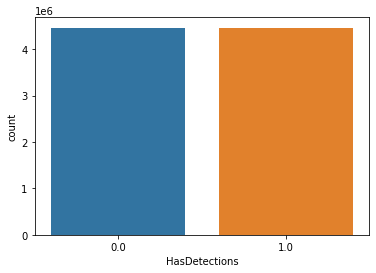

In [ ]:
#Verify the target distribution
#Target distribution: Large dataset
sns.countplot(x='HasDetections',data=y)

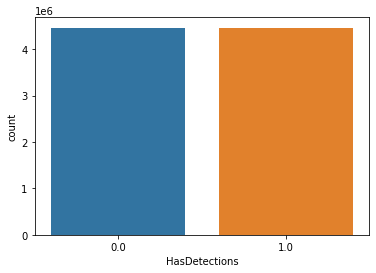

In [ ]:
#Target distribution: Small dataset
sns.countplot(x='HasDetections',data=datasetV7)

In [ ]:
#Download the new dataset
files.download('MalwareCleanedDataset.csv')